In [147]:
#Importing the necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import random
import plotly.express as px


In [148]:
#Reading the data

data = pd.read_csv("disney_movies.csv", parse_dates=["release_date"])
data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [149]:
# Extract year from release_date and store it in a new column
data['release_year'] = pd.DatetimeIndex(data["release_date"]).year 

data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [150]:
#Sorting the movies by inflation adjusted gross.

inflation_adjusted_gross=data.sort_values(by='inflation_adjusted_gross', 
                                                  ascending=False)


In [151]:
print('Top 10 movies by inflation adjusted gross are=')
print(inflation_adjusted_gross.head(10)["movie_title"])

Top 10 movies by inflation adjusted gross are=
0           Snow White and the Seven Dwarfs
1                                 Pinocchio
2                                  Fantasia
8                            101 Dalmatians
6                        Lady and the Tramp
3                         Song of the South
564    Star Wars Ep. VII: The Force Awakens
4                                Cinderella
13                          The Jungle Book
179                           The Lion King
Name: movie_title, dtype: object


In [152]:
#Sorting the movies by total gross.

total_gross=data.sort_values(by='total_gross', ascending=False)

In [153]:
print('Top 10 movies by total gross are=')
print(total_gross.head(10)["movie_title"])

Top 10 movies by total gross are=
564    Star Wars Ep. VII: The Force Awakens
524                            The Avengers
578            Rogue One: A Star Wars Story
571                            Finding Dory
558                 Avengers: Age of Ultron
441    Pirates of the Caribbean: Dead Man’…
179                           The Lion King
499                             Toy Story 3
532                              Iron Man 3
569              Captain America: Civil War
Name: movie_title, dtype: object


In [154]:
#Getting the values of the movie genres
movie_genres = data['genre'].unique()

print('The movie genres are-', movie_genres)

The movie genres are- ['Musical' 'Adventure' 'Drama' 'Comedy' nan 'Action' 'Horror'
 'Romantic Comedy' 'Thriller/Suspense' 'Western' 'Black Comedy'
 'Documentary' 'Concert/Performance']


In [155]:
#Groupng the data by genre and release year and getting the mean
group = data.groupby(['genre','release_year']).mean()
group_genres=group.reset_index()

In [156]:
group_genres.head()

,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.0
1,Action,1982,26918576.0,77184895.0
2,Action,1988,17577696.0,36053517.0
3,Action,1990,59249588.5,118358772.0
4,Action,1991,28924936.5,57918572.5


In [157]:
fig = px.line(group_genres, x='release_year', y='total_gross', color='genre', 
              title='Movie Genres by yearly mean gross per movie (Not adjusted for inflation)')
fig.show()

In [158]:
fig = px.line(group_genres, x='release_year', y='inflation_adjusted_gross', color='genre', 
              title='Movie Genres by yearly mean gross per movie (Adjusted for inflation)')
fig.show()

In [159]:
data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [160]:
#Groupng the data by genre and release year and getting the sum
genre_gross = data.groupby(['genre']).sum()
genre_data=genre_gross.reset_index()

genre_data=genre_data.drop(["release_year"],axis = 1)

In [161]:
genre_data

,genre,total_gross,inflation_adjusted_gross
0,Action,4184563282,5498936786
1,Adventure,16389069453,24561266158
2,Black Comedy,97543212,156730475
3,Comedy,8119619678,15409526913
4,Concert/Performance,103456466,114821678
5,Documentary,180685619,203488418
6,Drama,4106972970,8195804484
7,Horror,87068872,140483092
8,Musical,1157284155,9657565776
9,Romantic Comedy,1152206855,1788872933


Text(0.5, 0, 'Total Gross of all time adjusted for inflation')

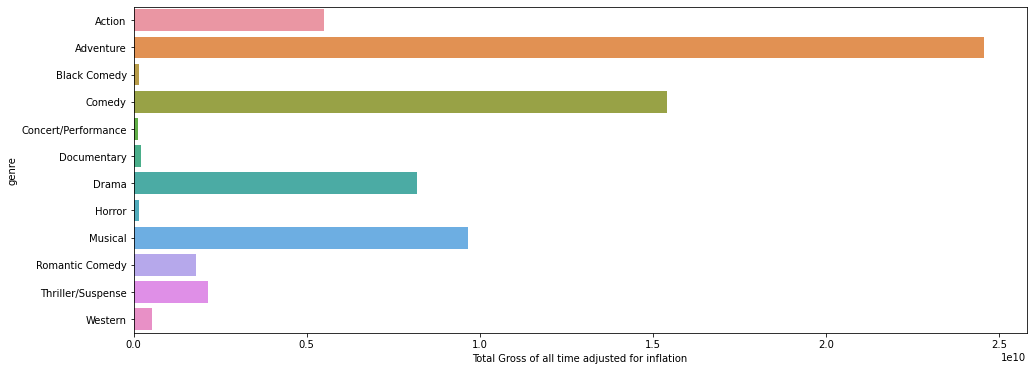

In [162]:
plt.figure(figsize=(16, 6))
ax= sns.barplot(data=genre_data,y='genre',x='inflation_adjusted_gross',)
ax.set_xlabel('Total Gross of all time adjusted for inflation')

Text(0.5, 0, 'Total Gross of all time without adjusted for inflation')

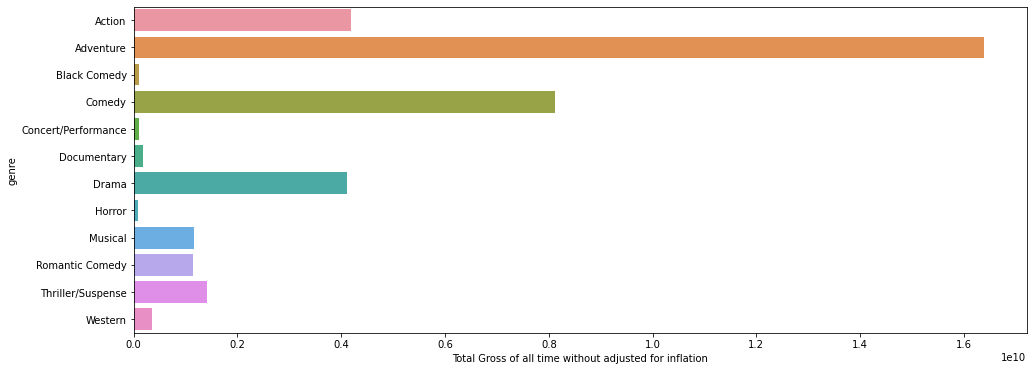

In [163]:
plt.figure(figsize=(16, 6))
ax= sns.barplot(data=genre_data,y='genre',x='total_gross',)
ax.set_xlabel('Total Gross of all time without adjusted for inflation')

In [164]:
#Now let us do some genre-wise analysis

In [165]:
data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


Adventure Movies

In [166]:
#selecting adventure movies
adv=data[data["genre"]=="Adventure"]

In [167]:
print("Adventure Movies with highest inflated adjusted gross are= ")
print((adv.sort_values("inflation_adjusted_gross",ascending=False).head(10))['movie_title'])

Adventure Movies with highest inflated adjusted gross are= 
1                                 Pinocchio
3                         Song of the South
564    Star Wars Ep. VII: The Force Awakens
179                           The Lion King
441    Pirates of the Caribbean: Dead Man’…
578            Rogue One: A Star Wars Story
5              20,000 Leagues Under the Sea
384                            Finding Nemo
571                            Finding Dory
499                             Toy Story 3
Name: movie_title, dtype: object


In [168]:
print("Adventure Movies with highest gross are= ")
print((adv.sort_values("total_gross",ascending=False).head(10))['movie_title'])

Adventure Movies with highest gross are= 
564    Star Wars Ep. VII: The Force Awakens
578            Rogue One: A Star Wars Story
571                            Finding Dory
441    Pirates of the Caribbean: Dead Man’…
179                           The Lion King
499                             Toy Story 3
539                                  Frozen
384                            Finding Nemo
567                         The Jungle Book
560                              Inside Out
Name: movie_title, dtype: object


Action Movies

In [169]:
#selecting action movies
act=data[data["genre"]=="Action"]

In [170]:
print("Action Movies with highest inflated adjusted gross are= ")
print((act.sort_values("inflation_adjusted_gross",ascending=False).head(10))['movie_title'])

Action Movies with highest inflated adjusted gross are= 
524                           The Avengers
558                Avengers: Age of Ultron
532                             Iron Man 3
569             Captain America: Civil War
343                           Pearl Harbor
544    Captain America: The Winter Soldier
250                                 Ransom
241                               The Rock
91                              Dick Tracy
296                     Enemy of the State
Name: movie_title, dtype: object


In [171]:
print("Action Movies with highest gross are= ")
print((act.sort_values("total_gross",ascending=False).head(10))['movie_title'])

Action Movies with highest gross are= 
524                           The Avengers
558                Avengers: Age of Ultron
532                             Iron Man 3
569             Captain America: Civil War
544    Captain America: The Winter Soldier
343                           Pearl Harbor
561                                Ant-Man
250                                 Ransom
241                               The Rock
296                     Enemy of the State
Name: movie_title, dtype: object


In [172]:
#Similar analysis can be done for other genres as well.